This notebook demonstrates how to use ```cthulhu``` with arbitrary data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cthulhu.reconstruct import Obsid
from cthulhu.plot_tools import setup_subplot, plot_tec, plot_vector_arrows

Generate some data with numpy. The scale of the "ionospheric offsets" are an arcminute. Real data could be used here instead; all that is required are the positions of pierce points, as well as the ionospheric offset at each pierce point.

In [2]:
np.random.seed(27182)
ra = np.random.uniform(-10, 10, size=2000)
dec = np.random.uniform(-37, -17, size=2000)
ra_shifts = np.random.normal(scale=1/60, size=2000)
dec_shifts = np.random.normal(scale=1/60, size=2000)

Data is processed by ```cthulhu``` via the ```Obsid``` class. Create an object from this class like so. We also go ahead and reconstruct the STEC responsible for these "ionospheric offsets".

In [3]:
o = Obsid((ra, dec, ra_shifts, dec_shifts))
o.reconstruct_tec()

If one wants to see the ionospheric offsets, the following works...

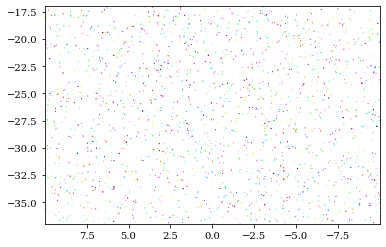

In [4]:
fig, ax = plt.subplots()
plot_vector_arrows(axis=ax, obsid=o)
plt.show()

... although not very well. Using ```setup_subplot``` makes things better.

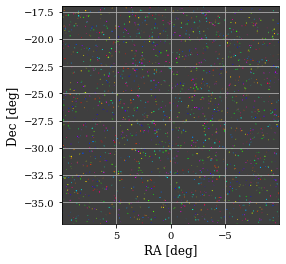

In [5]:
fig, ax = plt.subplots()
setup_subplot(axis=ax)
plot_vector_arrows(axis=ax, obsid=o)
plt.show()

```setup_subplot``` provides a convenient way to setup your labels and turn a grid on or off from a single line of code. Now, to plot the ionospheric offsets as well as the reconstructed TEC, you could do the following...

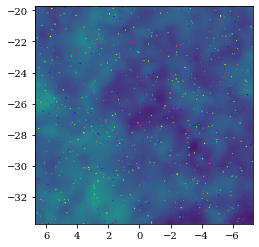

In [6]:
fig, ax = plt.subplots()
plot_vector_arrows(axis=ax, obsid=o)
ax.imshow(o.tec, extent=o.tec_extent, origin="lower", vmin=0, vmax=1)
ax.set_xlim(o.tec_extent[0], o.tec_extent[1])
ax.set_ylim(o.tec_extent[2], o.tec_extent[3])
plt.show()

... but it's easier to do this instead. Consult the ```plot_tools.py``` file for all the options available. The units (TECU) assume that the ionosphere is at a height of 400km.

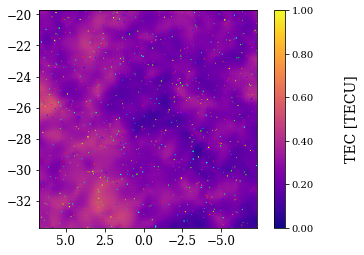

In [7]:
fig, ax = plt.subplots()
plot_vector_arrows(axis=ax, obsid=o)
plot_tec(axis=ax, obsid=o, vlim=(0, 1))
plt.show()

Now let's look at something more interesting. Generate some data again, but this time add a function to the ionospheric offsets which depends on position.

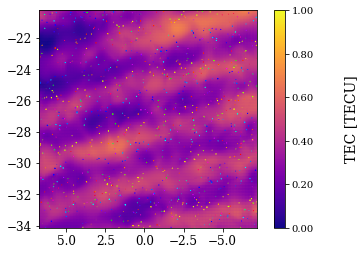

In [8]:
ra = np.random.uniform(-10, 10, size=2000)
dec = np.random.uniform(-37, -17, size=2000)
ra_shifts = np.sin(ra/2 + dec*2)/60 + np.random.normal(scale=1/60, size=2000)
dec_shifts = np.sin(ra/2 + dec*2)/60 + np.random.normal(scale=1/60, size=2000)

o = Obsid((ra, dec, ra_shifts, dec_shifts))
o.reconstruct_tec()

fig, ax = plt.subplots()
plot_vector_arrows(axis=ax, obsid=o)
plot_tec(axis=ax, obsid=o, vlim=(0, 1))
plt.show()

We can clearly see the waves manifesting in the reconstructed STEC, but the arrows are a little hard to see. The following shows how you can make them more visible.

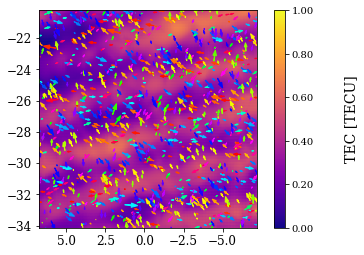

In [9]:
fig, ax = plt.subplots()
plot_vector_arrows(axis=ax, obsid=o, norm=True)
plot_tec(axis=ax, obsid=o, vlim=(0, 1))
plt.show()

This is good, but maybe a little cluttered. We can control the scaling manually.

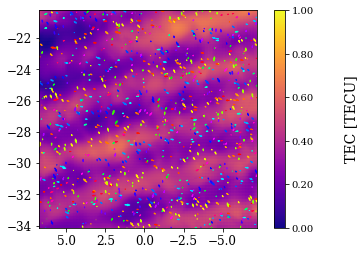

In [10]:
fig, ax = plt.subplots()
plot_vector_arrows(axis=ax, obsid=o, scale=5)
plot_tec(axis=ax, obsid=o, vlim=(0, 1))
plt.show()

Now the ionospheric shifts are easy to see, and it's obvious where the waves should appear without the reconstructed TEC. Also, if we aren't using equatorial coordinates (which is assumed by default), we can also easily change the axis labels.

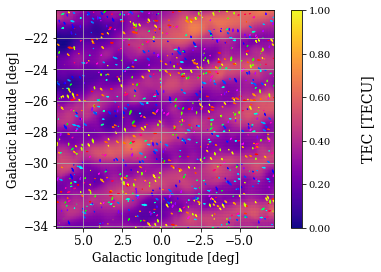

In [11]:
fig, ax = plt.subplots()
setup_subplot(axis=ax, xlabel="Galactic longitude [deg]", ylabel="Galactic latitude [deg]")
plot_vector_arrows(axis=ax, obsid=o, scale=5)
plot_tec(axis=ax, obsid=o, vlim=(0, 1))
plt.show()

Finally, a complete example is provided which shows the statistics of the ionospheric data as well.

Statistics: [[1.4364013238079452, 'med(abs(offsets)) [arcmin]'], [0.6611397972016004, 'PCA eigenvalue']]
Metric of ionospheric quality: 37.62040505616562


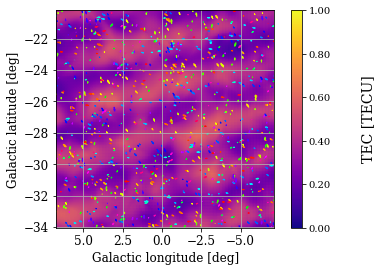

In [12]:
ra = np.random.uniform(-10, 10, size=2000)
dec = np.random.uniform(-37, -17, size=2000)
ra_shifts = np.sin(ra/2 + dec*2)/60 + np.random.normal(scale=1/60, size=2000)
dec_shifts = np.sin(ra/2 + dec*2)/60 + np.random.normal(scale=1/60, size=2000)

o = Obsid((ra, dec, ra_shifts, dec_shifts))
o.reconstruct_tec()
o.obsid_metric()
print("Statistics:", o.metrics)
print("Metric of ionospheric quality:", o.metric)

fig, ax = plt.subplots()
setup_subplot(axis=ax, xlabel="Galactic longitude [deg]", ylabel="Galactic latitude [deg]")
plot_vector_arrows(axis=ax, obsid=o, scale=5)
plot_tec(axis=ax, obsid=o, vlim=(0, 1))
plt.show()

The ```metrics``` attribute shows the statistics that have been coded to be displayed. At the moment, this is the median magnitude of all ionospheric offsets, as well as the degree of anisotropy determined by a principal component analysis. The ```metric``` attribute shows a value designed to give an "at a glance" indication of how bad the ionosphere is. It's designed to be below 10, with higher values being worse; > 30 is very bad!